In [1]:
import f3dasm
import numpy as np
import copy

2022-11-14 14:59:34.181291: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 14:59:34.258978: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
seed = 2023
dim = 10
iterations = 200
bounds = np.tile([-1.0,1.0], (dim, 1))
design = f3dasm.make_nd_continuous_design(bounds=bounds, dimensionality=dim)

function = f3dasm.functions.Sphere(dimensionality=dim, scale_bounds=bounds, seed=seed)

data = f3dasm.Data(design=design)
optimizer = f3dasm.optimization.CMAES(data=data, seed=seed)
sampler = f3dasm.sampling.LatinHypercube(design=design, seed=seed)

In [3]:
samples = sampler.get_samples(30)
samples.add_output(output=function(samples))

In [4]:
optimizer.set_data(copy.copy(samples))
optimizer.iterate(iterations=iterations, function=function)

In [5]:
optimizer.data

Data(design=DesignSpace(input_space=[ContinuousParameter(name='x0', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x1', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x2', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x3', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x4', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x5', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x6', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x7', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x8', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x9', _type='float', lower_bound=-1.0, upper_bound=1.0)], output_space=[ContinuousParameter(name='y', _type='float', lower_bound=-inf, upper_bound=inf)]), data=        input                           

In [6]:
from f3dasm.base.metaoptimizer import MetaOptimizer, BiOptimizer_Strategy

In [7]:
optimizer_1 = f3dasm.optimization.RandomSearch(data=samples, seed=seed)
optimizer_2 = f3dasm.optimization.Adam(data=samples, seed=seed)


strategy= BiOptimizer_Strategy(optimizer_1=optimizer_1, optimizer_2=optimizer_2)


metaoptimizer = MetaOptimizer(data=samples, strategy=strategy)

In [8]:
metaoptimizer.iterate(iterations=iterations, function=function)

(0.13043478260869565) selected optimizer_1
(0.13478260869565217) selected optimizer_1
(0.1391304347826087) selected optimizer_1
(0.14347826086956522) selected optimizer_1
(0.14782608695652175) selected optimizer_1
(0.15217391304347827) selected optimizer_1
(0.1565217391304348) selected optimizer_1
(0.1608695652173913) selected optimizer_1
(0.16521739130434782) selected optimizer_1
(0.16956521739130434) selected optimizer_1
(0.17391304347826086) selected optimizer_1
(0.1782608695652174) selected optimizer_1
(0.1826086956521739) selected optimizer_1
(0.18695652173913044) selected optimizer_1
(0.19130434782608696) selected optimizer_1
(0.1956521739130435) selected optimizer_1
(0.2) selected optimizer_1
(0.20434782608695654) selected optimizer_1
(0.20869565217391303) selected optimizer_1
(0.21304347826086956) selected optimizer_1
(0.21739130434782608) selected optimizer_1
(0.2217391304347826) selected optimizer_1
(0.22608695652173913) selected optimizer_1
(0.23043478260869565) selected opt

2022-11-14 14:59:37.052124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(0.5043478260869565) selected optimizer_2
(0.508695652173913) selected optimizer_2
(0.5130434782608696) selected optimizer_2
(0.5173913043478261) selected optimizer_2
(0.5217391304347826) selected optimizer_2
(0.5260869565217391) selected optimizer_2
(0.5304347826086957) selected optimizer_2
(0.5347826086956522) selected optimizer_2
(0.5391304347826087) selected optimizer_2
(0.5434782608695652) selected optimizer_2
(0.5478260869565217) selected optimizer_2
(0.5521739130434783) selected optimizer_2
(0.5565217391304348) selected optimizer_2
(0.5608695652173913) selected optimizer_2
(0.5652173913043478) selected optimizer_2
(0.5695652173913044) selected optimizer_2
(0.5739130434782609) selected optimizer_2
(0.5782608695652174) selected optimizer_2
(0.5826086956521739) selected optimizer_2
(0.5869565217391305) selected optimizer_2
(0.591304347826087) selected optimizer_2
(0.5956521739130435) selected optimizer_2
(0.6) selected optimizer_2
(0.6043478260869565) selected optimizer_2
(0.608695

(<Figure size 700x700 with 1 Axes>,
 <AxesSubplot: xlabel='$X_{0}$', ylabel='$X_{1}$'>)

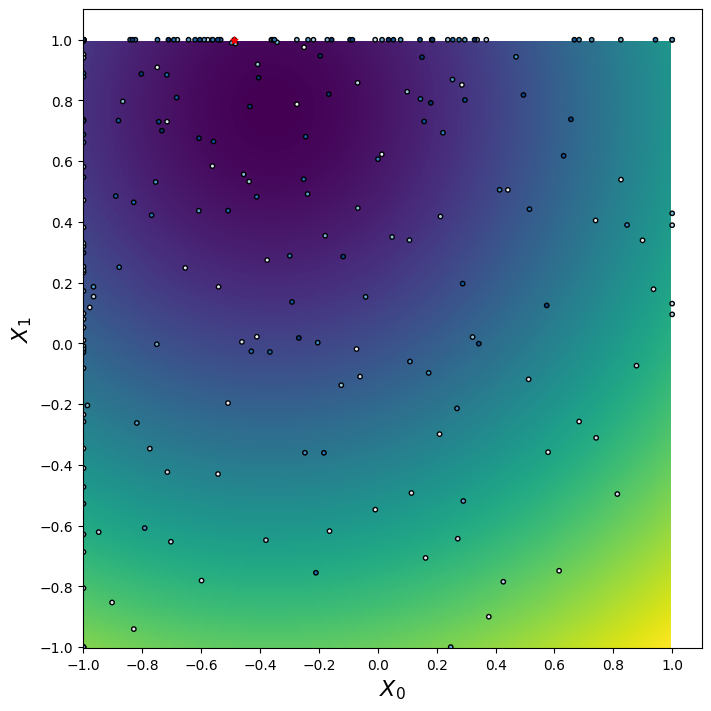

In [9]:
function.plot_data(data=optimizer.extract_data(), domain=bounds)

(<Figure size 700x700 with 1 Axes>,
 <AxesSubplot: xlabel='$X_{0}$', ylabel='$X_{1}$'>)

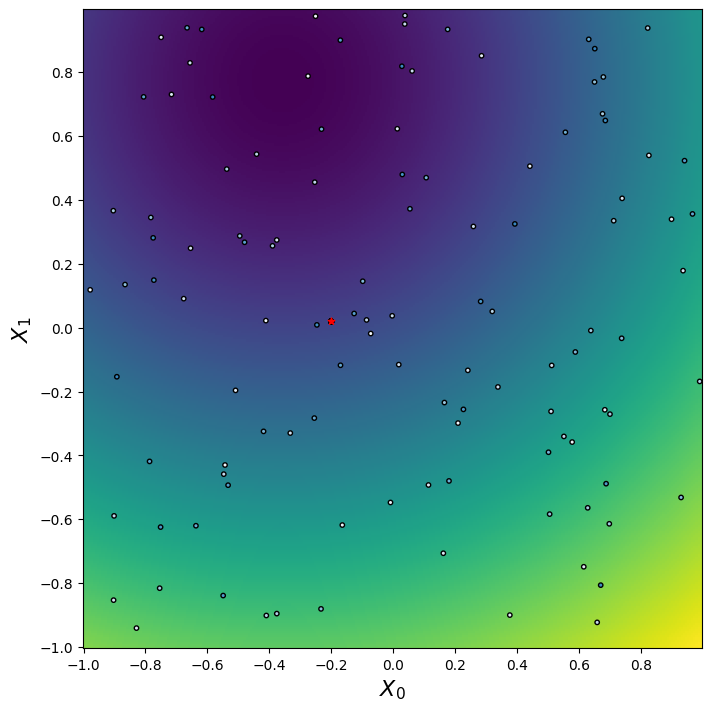

In [10]:
function.plot_data(data=metaoptimizer.extract_data(),domain=bounds)

In [11]:
metaoptimizer.data.data

input                                                              \
           x0        x1        x2        x3        x4        x5        x6   
0   -0.978534  0.118391 -0.060537 -0.340340  0.475192  0.798037  0.638763   
1   -0.250515  0.975123 -0.067256 -0.991560  0.738285 -0.668514 -0.998527   
2   -0.542955 -0.430025 -0.287967  0.822862 -0.990577 -0.048258 -0.129698   
3   -0.072337 -0.018417  0.503929 -0.747225 -0.659330  0.644659 -0.021778   
4   -0.411013  0.022062 -0.696439  0.475989  0.326642 -0.087091 -0.567760   
..        ...       ...       ...       ...       ...       ...       ...   
165 -0.200003  0.019839  0.132448 -0.264313 -0.592471  0.741603 -0.991362   
166 -0.200003  0.019839  0.132448 -0.264313 -0.592471  0.741603 -0.991362   
167 -0.200003  0.019839  0.132448 -0.264313 -0.592471  0.741603 -0.991362   
168 -0.200003  0.019839  0.132448 -0.264313 -0.592471  0.741603 -0.991362   
169 -0.200003  0.019839  0.132448 -0.264313 -0.592471  0.741603 -0.991362   

                                       output  
           x7        x8        x9           y  
0   -0.853609  0.780372 -0.258736  212.962217  
1   -0.352694 -0.179241 -0.351147   93.111505  
2   -0.951515  0.490356 -0.779492  206.191504  
3   -0.639136 -0.965041 -0.627601  129.598568  
4    0.962219  0.340245 -0.274894  119.329053  
..        ...       ...       ...         ...  
165  0.373544 -0.131284 -0.535455   50.708553  
166  0.373544 -0.131284 -0.535455   50.708553  
167  0.373544 -0.131284 -0.535455   50.708553  
168  0.373544 -0.131284 -0.535455   50.708553  
169  0.373544 -0.131284 -0.535455   50.708553  

[170 rows x 11 columns]